Notebook from here: https://faster-than-light.net/files/Real_Ray_Tracing.html

Opticspy provides real ray tracing module, primary lens design module as well as analysis.
1. Build Lens system by adding surfaces, wavelengths, fields
2. Trace ray through system, draw lens system
3. Lens system analysis: spotdiagram and ray aberration plot(Ray fan plot)¶
4. Real ray tracing through the system
5. Lens paraxial information calculation by ABCD matrix module
Following example shows use opticspy ray tracing module building a F/5 triplet with a max field=20 degree. Also it shows the spotdiagram and ray aberration plot of the system.
1. Build Lens system by adding surfaces, wavelengths, fields:

In [1]:
%matplotlib inline
from opticspy.ray_tracing import *

In [2]:
New_Lens = lens.Lens(lens_name='Triplet',creator='XF')
New_Lens.FNO = 5
New_Lens.lens_info()

Triplet
XF


In [3]:
New_Lens.add_wavelength(wl = 656.30)
New_Lens.add_wavelength(wl = 587.60)
New_Lens.add_wavelength(wl = 486.10)
New_Lens.list_wavelengths()

Add wavelength 656.3nm done
Add wavelength 587.6nm done
Add wavelength 486.1nm done
List all wavelength information
Wavelength 486.1 nm
Wavelength 587.6 nm
Wavelength 656.3 nm


In [4]:
New_Lens.add_field_YAN(angle=0)
New_Lens.add_field_YAN(angle=14)
New_Lens.add_field_YAN(angle=20)
New_Lens.list_fields()

Add field angle:0 degree done
Add field angle:14 degree done
Add field angle:20 degree done
list all fields information
Field angle: 0
Field angle: 14
Field angle: 20


In [5]:
New_Lens.add_surface(number=1,radius=10000000,thickness=1000000,glass='air',output=True)
New_Lens.add_surface(number=2,radius=41.15909,thickness=6.097555 ,glass='S-BSM18_ohara',output=True)
New_Lens.add_surface(number=3,radius=-957.83146,thickness=9.349584,glass='air',output=True)
New_Lens.add_surface(number=4,radius=-51.32104,thickness=2.032518,glass='N-SF2_schott',output=True)
New_Lens.add_surface(number=5,radius=42.37768 ,thickness=5.995929 ,glass='air',output=True)
New_Lens.add_surface(number=6,radius=10000000,thickness=4.065037,glass='air',STO=True,output=True)
New_Lens.add_surface(number=7,radius=247.44562,thickness=6.097555,glass='S-BSM18_ohara',output=True)
New_Lens.add_surface(number=8,radius=-40.04016,thickness=85.593426,glass='air',output=True)
New_Lens.add_surface(number=9,radius=10000000,thickness=0,glass='air',output=True)

-----------------------Add surface:-------------------------------
------------------------------------------------------------------
| Num   |  Radius     |  Thickness   |  Glass           |  STO   |
------------------------------------------------------------------
| 1     |  Infinity   |  Infinity    |  air             |  False |
------------------------------------------------------------------
-----------------------Add surface:-------------------------------
------------------------------------------------------------------
| Num   |  Radius     |  Thickness   |  Glass           |  STO   |
------------------------------------------------------------------
| 2     |  41.1591    |  6.0976      |  S-BSM18_ohara   |  False |
------------------------------------------------------------------
-----------------------Add surface:-------------------------------
------------------------------------------------------------------
| Num   |  Radius     |  Thickness   |  Glass           |  STO


2. Trace ray through system, draw lens system(first do refresh_paraxial function find entrace pupil position)

In [6]:
New_Lens.refresh_paraxial()

------------Calculating EFL---------------
start surface: 2
end surface: 8
Rear Focal Length f': 100.00090219464373
---------Calculating Entrance Pupil Position-----------
STOP Surface 6
STOP thickness 5.995929
start surface: 2
end surface: 5
entrance pupil position EP: 27.821660438933492
------------Calculating OAL---------------
start surface: 2
end surface: 9
Overall length: 119.23160399999999


------------------start drawing lens system-------------


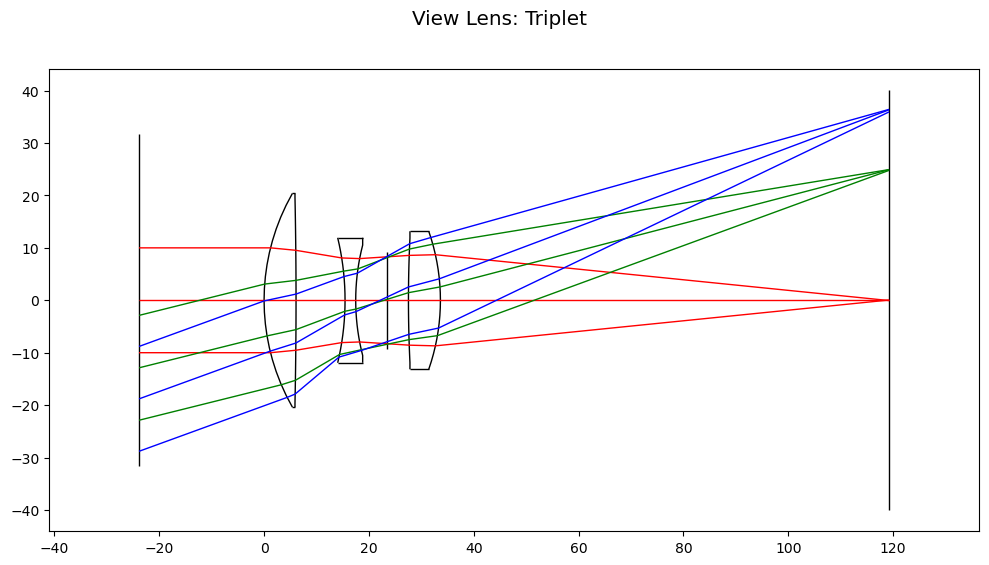

In [7]:
dict_list = trace.trace_draw_ray(New_Lens)
draw.draw_system(New_Lens)

3. Lens system analysis: spotdiagram and ray aberration plot(Ray fan plot):
Opticspy provide three kinds of tracing grid:
In grid type, n = rays go through y axis of entrance pupil
In circular type, n = ray rings in entrance pupil
In random type, n = rays go through entrance pupil

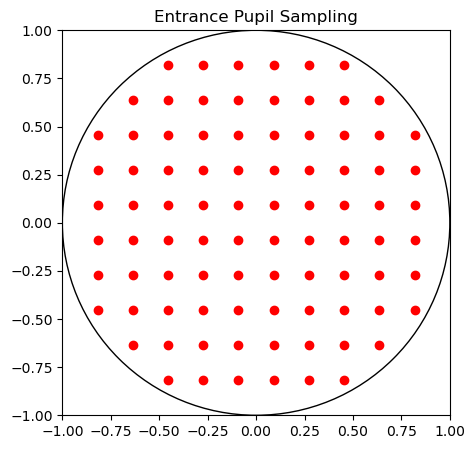

0

In [8]:
field.grid_generator(12,grid_type='grid',output = 1)

RMS 0.28696059788558376
RMS 0.5245033701002134
RMS 1.0897134423286856


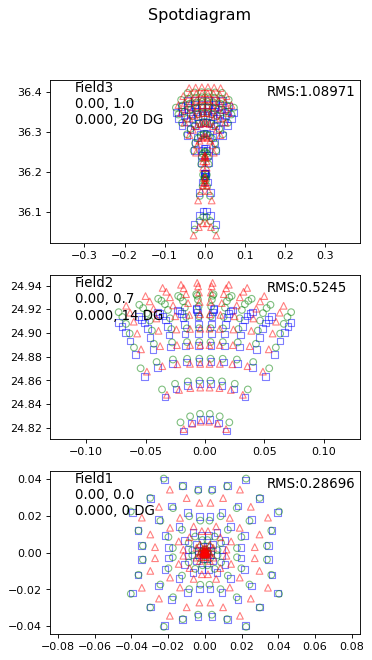

0

In [9]:
analysis.spotdiagram(New_Lens,[1,2,3],[1,2,3],n=12,grid_type='grid')

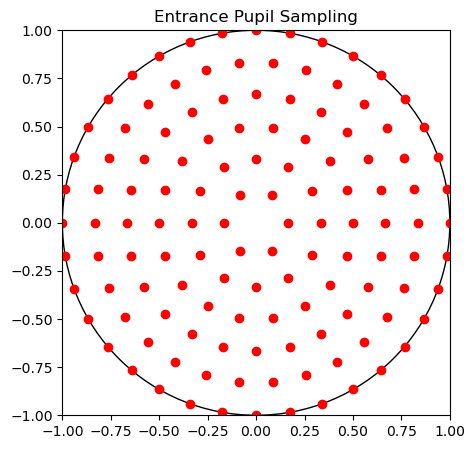

0

In [10]:
field.grid_generator(6,grid_type='circular',output = 1)

RMS 0.44798467593529395
RMS 0.7525069380538699
RMS 1.6537425439233586


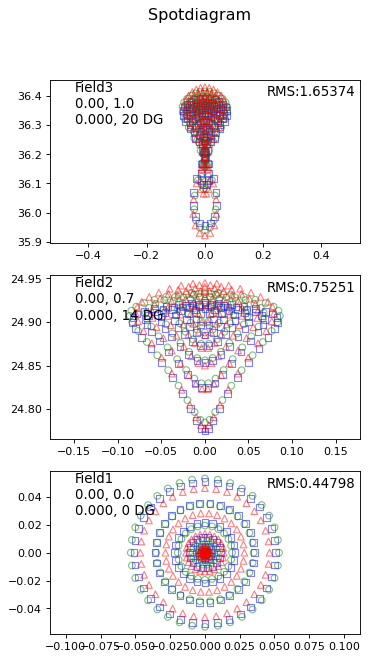

0

In [11]:
analysis.spotdiagram(New_Lens,[1,2,3],[1,2,3],n=6,grid_type='circular')

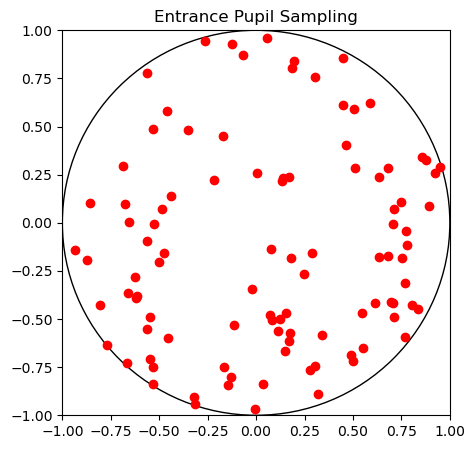

0

In [12]:
field.grid_generator(100,grid_type='random',output = 1)

RMS 0.3244591002768768
RMS 0.6086478276763447
RMS 1.2070238542467466


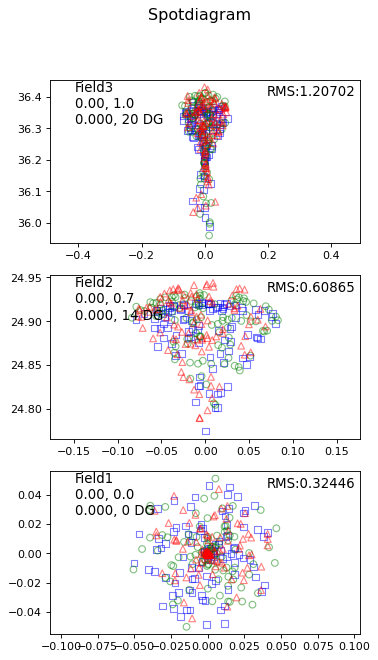

0

In [13]:
analysis.spotdiagram(New_Lens,[1,2,3],[1,2,3],n=100,grid_type='random')

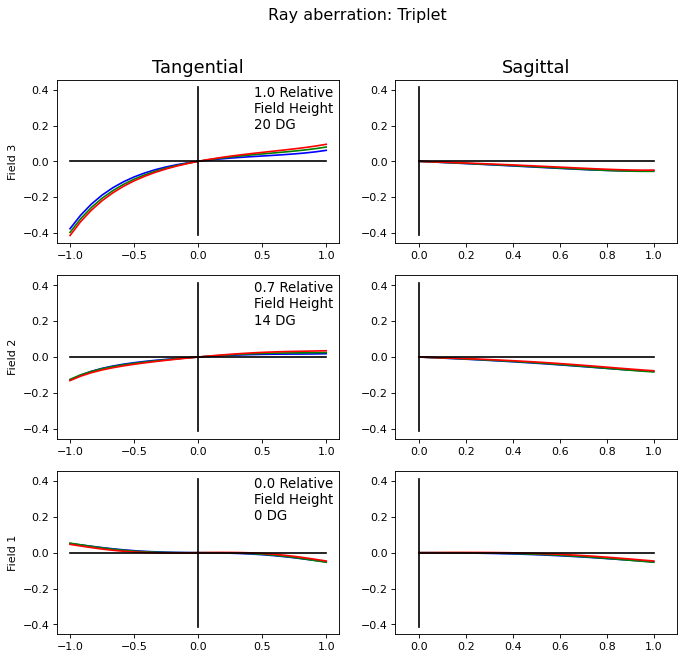

0

In [14]:
analysis.Ray_fan(New_Lens,[1,2,3],[1,2,3])

4. Real ray tracing through the system: user could choose different ray positions(relative to entrace pupil), fields and wavelengths to trace. Also user could choose output format, there are ray position output X,Y,Z and ray direction output K,M,L as well as start and end surface choice:
First example is tracing one ray in field 2(wavelength 1) go through bottom of entracne pupil(sagittal), output ray postion X,Y,Z, start and end surface use default(all surface):

In [15]:
trace.trace_one_ray(New_Lens,field_num=2,wave_num=1,ray=[0,-1],start=0,end=0,output=True,output_list=['X','Y','Z'])

Num  X         Y         Z         
2    0.00      -16.12    3.29      
3    0.00      -15.27    -0.12     
4    0.00      -10.29    -1.04     
5    0.00      -9.39     1.05      
6    0.00      -8.36     0.00      
7    0.00      -7.48     0.11      
8    0.00      -6.73     -0.57     
9    0.00      24.77     0.00      


0

Second example is tracing chief ray in field 3(wavelength 2), output ray postion X,Y,Z, start surface 3 and end surface 7:

In [16]:
trace.trace_one_ray(New_Lens,3,2,[0,0],start=3,end=7,output=True,output_list=['X','Y','Z','K','L','M'])

Num  X         Y         Z         K         L         M         
3    0.00      -8.16     -0.03     0.00      0.50      0.87      
4    0.00      -2.80     -0.08     0.00      0.28      0.96      
5    0.00      -2.17     0.06      0.00      0.43      0.91      
6    0.00      0.62      0.00      0.00      0.43      0.91      
7    0.00      2.54      0.01      0.00      0.26      0.97      


0

5. Lens paraxial information calculation by ABCD matrix module: image position, effective focal length, back focal length, entrance pupil position and diameter, exit pupil position, focal length from surface x to y, thickness between 2 surfaces, etc:

In [17]:
New_Lens.image_position()

------------Calculating image position---------------
object distance -1000000
start surface: 2
end surface: 8
image position: 85.5835004073561


In [18]:
New_Lens.EFY()

------------Calculating EFL---------------
start surface: 2
end surface: 8
Rear Focal Length f': 100.00090219464373


100.00090219464373

In [19]:
New_Lens.EFY(2,3)

------------Calculating EFL---------------
start surface: 2
end surface: 3
Rear Focal Length f': 61.950050393058596


61.950050393058596

In [20]:
New_Lens.BFL()

------------Calculating BFL---------------
Back focal length: 85.593426


In [21]:
New_Lens.EP()

---------Calculating Entrance Pupil Position-----------
STOP Surface 6
STOP thickness 5.995929
start surface: 2
end surface: 5
entrance pupil position EP: 27.821660438933492


27.821660438933492

In [22]:
New_Lens.EPD

20.000180438928744

In [23]:
New_Lens.EX()

---------Calculating Exit Pupil Position-----------
STOP Surface 6
STOP thickness 4.065037
start surface: 7
end surface: 8
exit pupil position EX: -8.946534653664585


In [24]:
New_Lens.OAL(2,7)

------------Calculating OAL---------------
start surface: 2
end surface: 7
Overall length: 27.540623
